**Discription**

- The object of this Adult Census Income Predicition dataset is to predict wheather adult person 50k+ Plus income or 50k- Minus income The dataset consists of several adult predictor (Independent) variable and one target variable (salary).Predictor variable includes age,workclass,fnlwgt,education,education_num,matital_seatus,occupation,relationship,rece,sex,capital_gain,capital_loss,hours_per_week,country and salary.  

**Libraries Import**

In [1]:
# Numpy 
import numpy as np

# Pandas
import pandas as pd

# Matplotlib 
import matplotlib.pyplot as plt

# Seaborn
import seaborn as sns

# Import standard scaler
from sklearn.preprocessing import StandardScaler

# Import train & test split library
from sklearn.model_selection import train_test_split

# Import accuracy test library
from sklearn.metrics import accuracy_score

# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# import classification report
from sklearn.metrics import classification_report

# Warnings
import warnings 
warnings.filterwarnings('ignore')

**Load DataSet**

In [2]:
# Dataset load

df = pd.read_csv('/content/drive/MyDrive/iNeuron ML Project/Adult Census Income Prediction/adult.csv')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# **Exploratory Data Analysis**

In [3]:
# Get familier with dataset,display the top five data records
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# Get familer with dataset,display the last 5 data records
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
# Get familier with dataset, display randomly 5 data records
df.sample(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
18472,32,Private,240888,Assoc-acdm,12,Divorced,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
5329,45,Local-gov,37306,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,United-States,>50K
6181,50,Private,178530,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K
25141,23,Private,41721,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,55,United-States,>50K
23093,23,Private,165064,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K


In [6]:
# Getting to know about rows and columns we're dealing with - 32561 rows and 15 columns
df.shape


(32561, 15)

In [7]:
# Learning about the columns 
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'salary'],
      dtype='object')

In [8]:
# Knowleged of data type helps for computation
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
country           object
salary            object
dtype: object

In [9]:
# Check for missing values, count them and print the sum for every columns
# Conclusion :- There are no null values in this dataset

df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [10]:
# Print a concise summary of a DataFrame.
# This method prints information about a DataFrame including the index dtype and columns,
# Non-null values and memory usege

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [11]:
# Help us to understand how data has been spread across the table.
# Count :- The number of Non-empty rows in a feature.
# mean :- mean value of that feature.
# std :- standard deviation values of that feature.
# min :- minimum values of that feature.
# max :- maximum value of that feature.
# 25%, 50%, and 75% the percentile/quartile of each features.

df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [12]:
df['salary'].value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

In [13]:
income_all = df['salary'].value_counts(normalize=True)
income_all*100

 <=50K    75.919044
 >50K     24.080956
Name: salary, dtype: float64

**The data is skewed because we have 75% of the data for people who has less than 50K salary and only 25% of the data people with greater than 50K salary.**

# **Data Visualization**

**Pie Plot and Count Plot**

Salary Total Values : 32561
<=50K (0) 24720
 50K (1) 7841


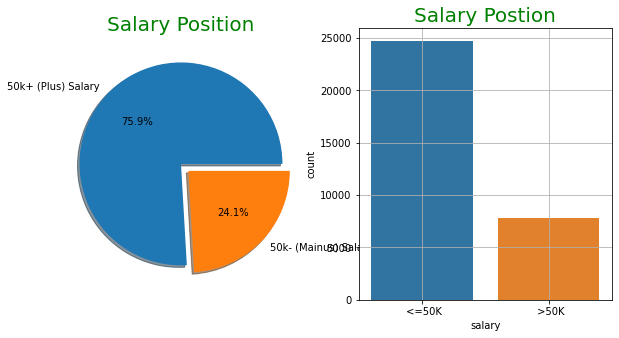

In [14]:
# Salary Pai Plot and Count Plot

f,ax = plt.subplots(1,2,figsize=(10,5))
mylabels = ['50k+ (Plus) Salary','50k- (Mainus) Salary']
df['salary'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],labels=mylabels ,shadow=True)
ax[0].set_title('Salary Position',size=20,color='g')
ax[0].set_ylabel('')

sns.countplot('salary',data=df,ax=ax[1])
ax[1].set_title('Salary Postion',size=20,color='g')

NS,S = df['salary'].value_counts()
print('Salary Total Values :', df['salary'].value_counts().sum())
print('<=50K (0)',NS)
print(' 50K (1)',S)
plt.grid()
plt.show()

- Out of total people, **24720** are **50k+ salary(0)** and **7841** are did **50k- salary(1)**.
- In the Salary columns, 0 represent Salary 50k+ plus and 1 represent salary 50k-.
- The count plot tells us that database is imbalanced, as number 

**Histogram**
- Histograms are one of the most common graphs used to display numeric data.
- Distribution of the data - Whether the data is normally distributed or if it's skewed.

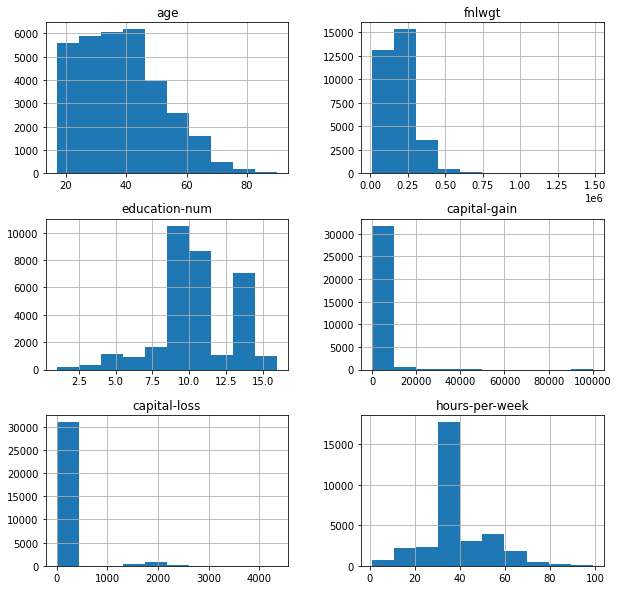

In [15]:
# Histogram of each feature
df.hist(figsize=(10,10))
plt.show()

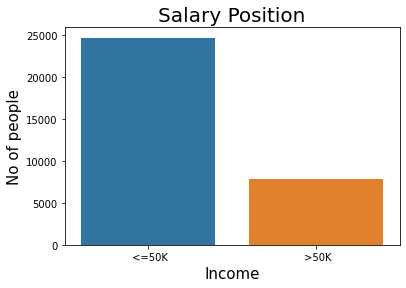

In [16]:
# Salary ....
sns.countplot('salary',data=df)
df['age'].value_counts()
plt.title('Salary Position',size=20)
plt.xlabel('Income',size=15)
plt.ylabel('No of people',size=15)
plt.show()

In [17]:
df['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [18]:
sex = df['sex'].value_counts(normalize=True)
sex* 100

 Male      66.920549
 Female    33.079451
Name: sex, dtype: float64

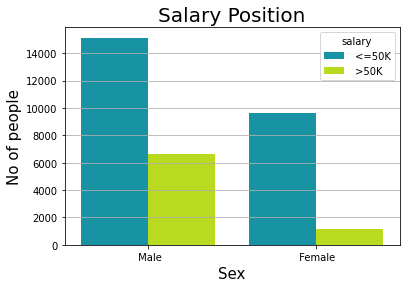

In [19]:
plt.title('Salary Position',size=20)
sns.countplot('sex',data=df,hue='salary', palette  = 'nipy_spectral')
plt.xlabel('Sex',fontsize=15)
plt.ylabel('No of people',fontsize=15)
plt.grid(axis='y')

**Based on Education**

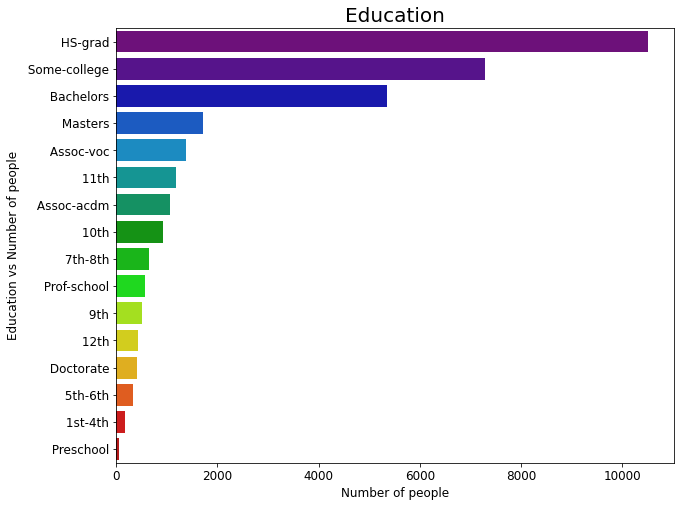

In [20]:
plt.figure(figsize=(10,8))

education = df["education"].value_counts()
sns.barplot(education.values, education.index, palette='nipy_spectral')
plt.title('Education',size=20)
plt.xlabel('Number of people',size=12)
plt.ylabel('Education vs Number of people',size=12)
plt.tick_params(labelsize=12)
plt.show()

**Education Vs Salary**

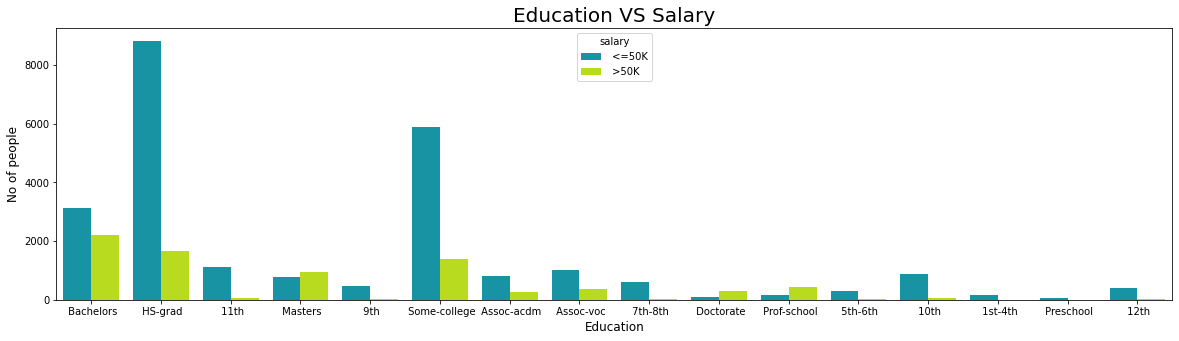

In [21]:
plt.figure(figsize=(20,5))
sns.countplot(data = df, x = 'education', hue="salary", palette = 'nipy_spectral')
plt.title('Education VS Salary',size=20)
plt.xlabel("Education", fontsize= 12)
plt.ylabel("No of people", fontsize= 12)
# plt.ylim(0,20000) 
plt.show()

**The people who has masters, Doctorate,Prof-school tend to be earning more then 50K that the other degrees**




**Obviously!!!**

**Based on occupation**

In [22]:
df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

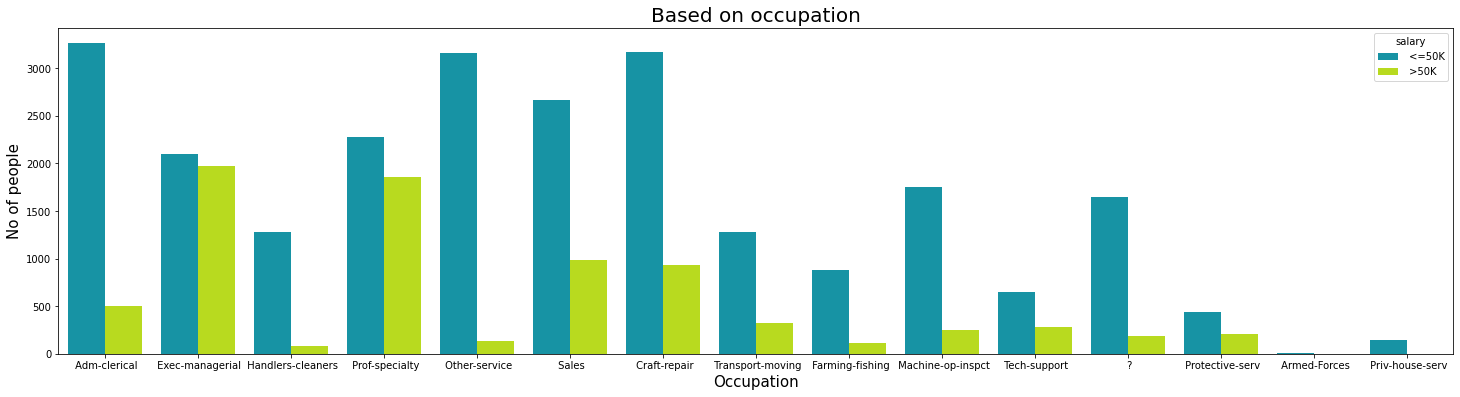

In [23]:
plt.figure(figsize=(25,6))
sns.countplot(data = df, x = 'occupation',hue='salary',palette = 'nipy_spectral')
plt.title('Based on occupation',size=20)
plt.xlabel('Occupation',fontsize=15)
plt.ylabel('No of people',fontsize=15)
plt.show()

**Based on Race**

In [24]:
df['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

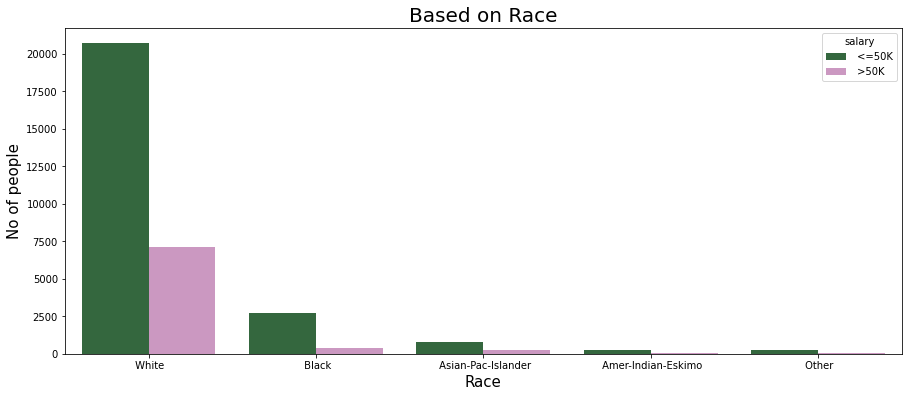

In [25]:
plt.figure(figsize=(15,6))
sns.countplot(data=df,x='race',hue='salary',palette = 'cubehelix')
plt.title('Based on Race',size=20)
plt.xlabel('Race',fontsize=15)
plt.ylabel('No of people',fontsize=15)

plt.show()

**Base on WorkClass**

In [26]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

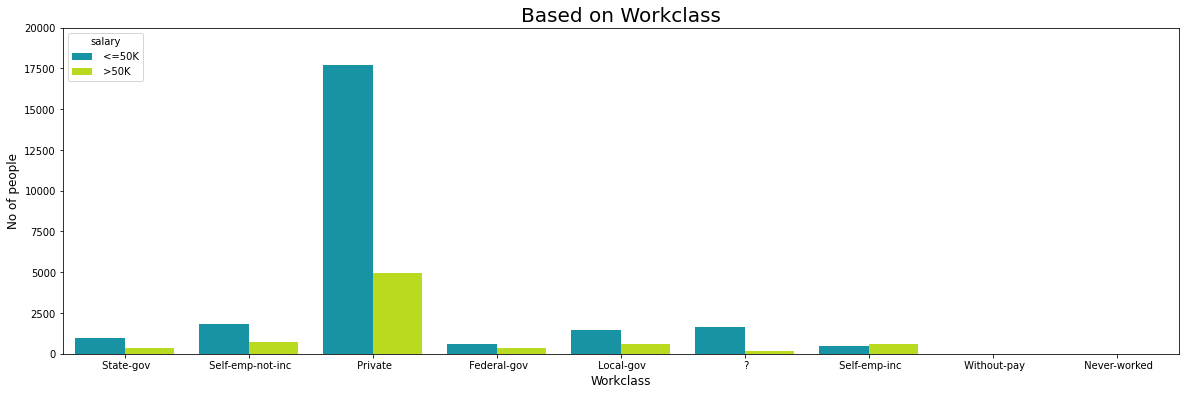

In [27]:
plt.figure(figsize=(20,6))
sns.countplot(data = df, x = 'workclass', hue="salary", palette = 'nipy_spectral')
plt.title('Based on Workclass',size=20)
plt.xlabel("Workclass", fontsize= 12)
plt.ylabel("No of people", fontsize= 12)
plt.ylim(0,20000) 
plt.show()

**Base on Marital-Status**

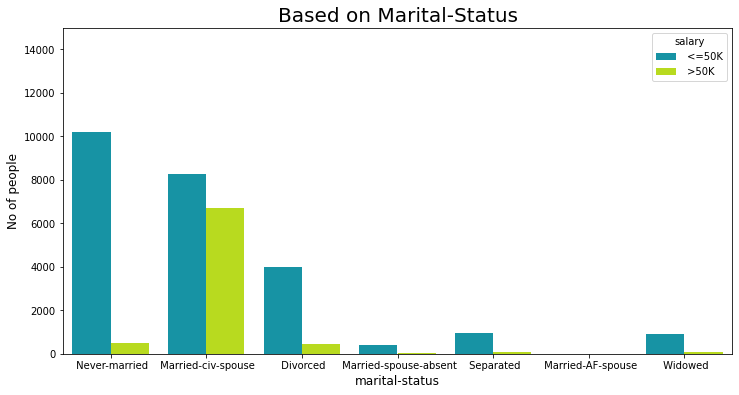

In [28]:
plt.figure(figsize=(12,6))
sns.countplot(data = df, x = 'marital-status', hue="salary", palette = 'nipy_spectral')
plt.title('Based on Marital-Status',size=20)
plt.xlabel("marital-status", fontsize= 12)
plt.ylabel("No of people", fontsize= 12)
plt.ylim(0,15000) 
plt.show()

# **Feature Engineering**

In [29]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [30]:
df['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [31]:
df['education-num'].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education-num, dtype: int64

In [32]:
df['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [33]:
df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [34]:
df['relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [35]:
df['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [36]:
df['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [37]:
df['country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [38]:
df.isin([' ?']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
country            583
salary               0
dtype: int64

In [39]:
df.replace(' ?',0,inplace=True)

In [40]:
df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
0                     1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [41]:
data = df.replace(0,np.nan)

In [42]:
df['workclass'] = df['workclass'].fillna(df['workclass'].mode()[0])

df['occupation'] = df['occupation'].fillna(df['occupation'].mode()[0])

df['country'] = df['country'].fillna(df['country'].mode()[0])

In [43]:
data['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

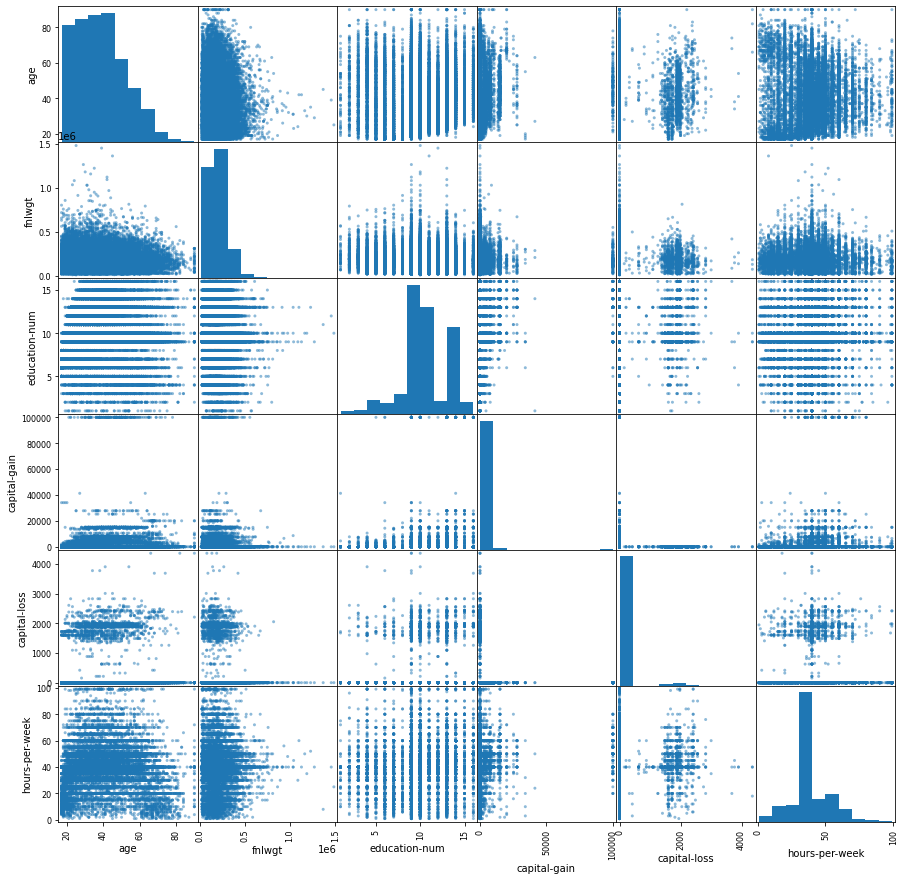

In [44]:
# Scatter Plot matrix
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(15,15));

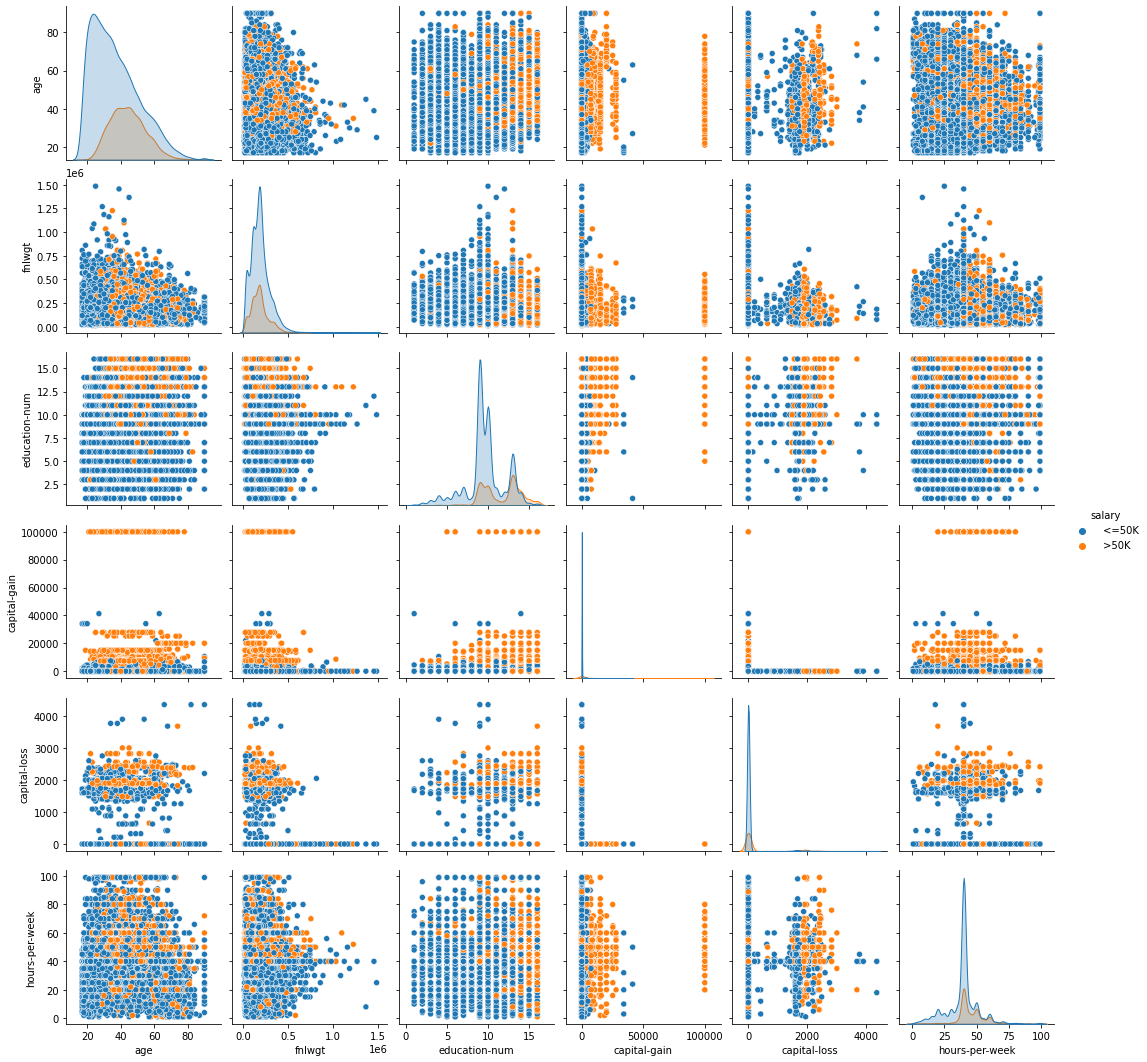

In [45]:
# Pair Plot
sns.pairplot(data=df, hue='salary')
plt.show()

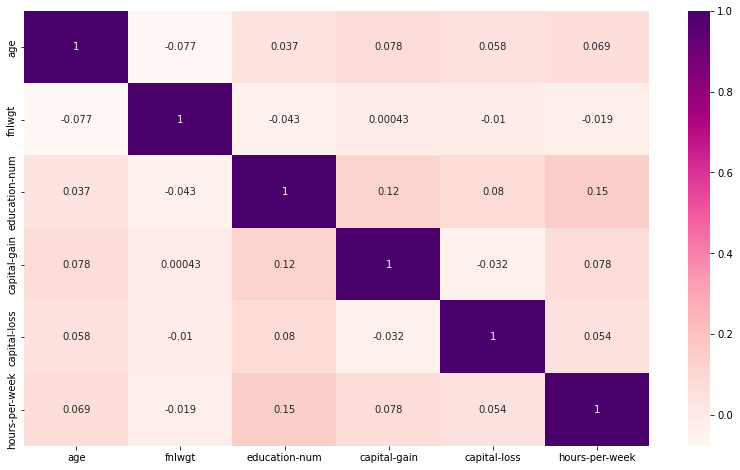

In [46]:
# Analysis relationships between variables
corrmat=df.corr()
plt.figure(figsize=(14,8))
sns.heatmap(corrmat,cmap='RdPu', annot=True)
plt.show()

# **Label Encoding**

In [47]:
# Import label encoding library

from sklearn.preprocessing import LabelEncoder

In [48]:
le = LabelEncoder()

In [49]:
for col in df.columns:
  if df[col].dtype=='object':
    le=LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

In [50]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0


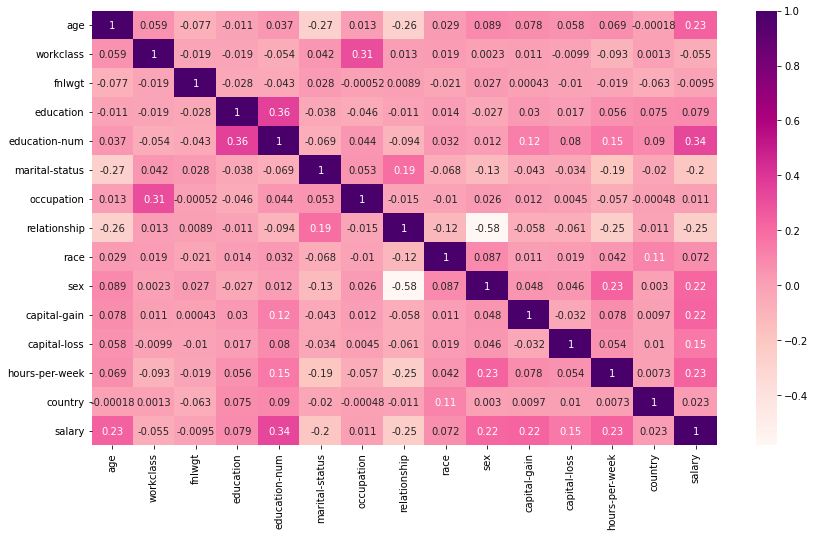

In [100]:
# Analysis relationships between variables
corrmat=df.corr()
plt.figure(figsize=(14,8))
sns.heatmap(corrmat,cmap='RdPu', annot=True)
plt.show()

**Observations**

- From the correlation heatmap,we can see that there is a high correlation betwoon salary and [education,education_num and occupaction].
- We can select these features to accept input from the user and predict the selary.

# **Split The Data Frame into X & y**

In [51]:
target_name = 'salary'

# Separate object for targat feature 
y = df[target_name]

# Separate object for input feature
X = df.drop(target_name,axis=1)

In [52]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4


In [53]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: salary, dtype: int64

In [54]:
y.sample(5)

19663    0
19051    0
12320    1
12517    0
17886    0
Name: salary, dtype: int64

# **Apply Feature Scaling**

In [55]:
scaler = StandardScaler()
scaler.fit(X)
SSX = scaler.transform(X)

# **Sliting Train & Test Data**

In [56]:
X_train, X_test, y_train, y_test = train_test_split(SSX, y, test_size=0.33, random_state=42)

In [57]:
# Train data shape
X_train.shape, y_train.shape

((21815, 14), (21815,))

In [58]:
# Test data shape
X_test.shape, y_test.shape

((10746, 14), (10746,))

In [59]:
X_train


array([[ 0.91042156, -0.23790601, -0.62861582, ..., -0.21665953,
         0.77446821,  0.25137765],
       [ 0.54385864,  2.92262342, -0.3911891 , ..., -0.21665953,
        -0.03542945, -1.22815575],
       [-0.99570562, -0.23790601,  0.7357067 , ..., -0.21665953,
         1.17941704,  0.25137765],
       ...,
       [-1.5088937 , -0.23790601,  0.25112313, ..., -0.21665953,
        -1.65522476,  0.25137765],
       [ 0.83710898,  1.02630576, -1.2839363 , ..., -0.21665953,
         3.52812024,  0.25137765],
       [-0.33589236,  0.39419988, -0.58861519, ..., -0.21665953,
         1.58436587,  0.25137765]])

In [60]:
y_train

27585    1
18010    0
22472    0
4585     0
11191    1
        ..
29802    0
5390     0
860      0
15795    0
23654    0
Name: salary, Length: 21815, dtype: int64

# **Machine Learning Algorithm's**

# **kNeighborsClassifier(KNN) using grid search cv**

In [61]:
# import sklearn KNeighborsClassifier(KNN) and grid search cv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [62]:
knn = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [63]:
print("best_estimator result :-",grid_search.best_estimator_)
print("best_params result :-",grid_search.best_params_)

best_estimator result :- KNeighborsClassifier(n_neighbors=24)
best_params result :- {'n_neighbors': 24}


In [64]:
knn = KNeighborsClassifier(n_neighbors=24)
knn.fit(X, y)

y_pred_train=knn.predict(X_train) 
accuracy_1 = accuracy_score(y_train,y_pred_train)
print('Accuracy for train data :',accuracy_1)

y_pred_test=knn.predict(X_test) 
accuracy_1 = accuracy_score(y_test,y_pred_test)
print('Accuracy for test data :',accuracy_1)


Accuracy for train data : 0.7574604629841852
Accuracy for test data : 0.7627024008933556


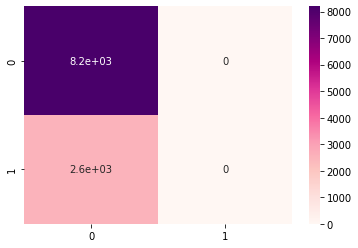

In [65]:

c_matrix_1 = confusion_matrix(y_test,y_pred_test)
c_matrix_1

#Utilizing the heatmap function we have presented the confusion matrix.
sns.heatmap(c_matrix_1 , cmap='RdPu',annot=True)
plt.show()

In [66]:
target_names = ['50k+ Plus Salary','50k- Minus Salary']
print(classification_report(y_test, y_pred_test, target_names=target_names))

                   precision    recall  f1-score   support

 50k+ Plus Salary       0.76      1.00      0.87      8196
50k- Minus Salary       0.00      0.00      0.00      2550

         accuracy                           0.76     10746
        macro avg       0.38      0.50      0.43     10746
     weighted avg       0.58      0.76      0.66     10746



# **Navie-Bayes Algorithm**

In [67]:
# import sklearn naive_bayes 
from sklearn.naive_bayes import GaussianNB

In [68]:
gnb = GaussianNB(var_smoothing=1)
y_pred = gnb.fit(X_train,y_train).predict(X_test)

y_pred_train = gnb.predict(X_train)
accuracy_2 = accuracy_score(y_train,y_pred_train)
print('Accuracy for train data Result :',accuracy_2)

y_pred_test = gnb.predict(X_test)
accuracy_2 = accuracy_score(y_test,y_pred_test)
print('Accuracy for test data Result :',accuracy_2)

Accuracy for train data Result : 0.7904194361677744
Accuracy for test data Result : 0.7997394379303927


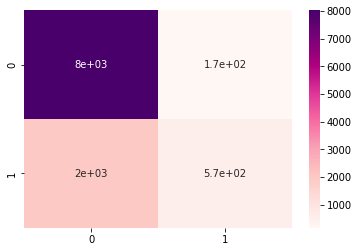

In [69]:


c_matrix_1 = confusion_matrix(y_test,y_pred_test)
c_matrix_1

#Utilizing the heatmap function we have presented the confusion matrix.
sns.heatmap(c_matrix_1 , cmap='RdPu',annot=True)
plt.show()

In [70]:
target_names = ['50k+ Plus Salary','50k- Minus Salary']
print(classification_report(y_test, y_pred_test, target_names=target_names))

                   precision    recall  f1-score   support

 50k+ Plus Salary       0.80      0.98      0.88      8196
50k- Minus Salary       0.77      0.22      0.35      2550

         accuracy                           0.80     10746
        macro avg       0.79      0.60      0.61     10746
     weighted avg       0.79      0.80      0.75     10746



# **Logistic-Regression Algroithm using grid search cv**

In [71]:
# import Logistic-Regrassion and grid search cv
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [72]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}   # l1 lasso l2 ridge
logreg = LogisticRegression()

# defining parameter range
logreg_cv = GridSearchCV(logreg,grid,cv=10)

# fitting the model for grid search
grid_search_log=logreg_cv.fit(X_train, y_train)

In [73]:
print("best_estimator result :-",grid_search_log.best_estimator_)
print("best_params result :-",grid_search_log.best_params_)

best_estimator result :- LogisticRegression()
best_params result :- {'C': 1.0, 'penalty': 'l2'}


In [74]:
logistic = LogisticRegression(C=10.0,penalty="l2")
y_pred = logistic.fit(X_train,y_train)


y_pred_train = logistic.predict(X_train)
accuracy_3 = accuracy_score(y_train,y_pred_train)
print('Accuracy for train data Result :',accuracy_3)

y_pred_test = logistic.predict(X_test)
accuracy_3 = accuracy_score(y_test,y_pred_test)
print('Accuracy for test data Result :',accuracy_3)

Accuracy for train data Result : 0.8241118496447398
Accuracy for test data Result : 0.82607481853713


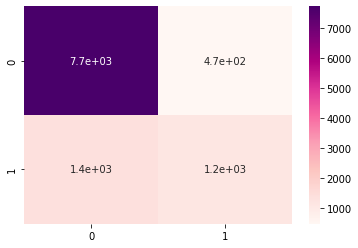

In [75]:

c_matrix_1 = confusion_matrix(y_test,y_pred_test)
c_matrix_1

#Utilizing the heatmap function we have presented the confusion matrix.
sns.heatmap(c_matrix_1 , cmap='RdPu',annot=True)
plt.show()

In [76]:
target_names = ['50k+ Plus Salary','50k- Minus Salary']
print(classification_report(y_test, y_pred_test, target_names=target_names))

                   precision    recall  f1-score   support

 50k+ Plus Salary       0.85      0.94      0.89      8196
50k- Minus Salary       0.71      0.45      0.55      2550

         accuracy                           0.83     10746
        macro avg       0.78      0.70      0.72     10746
     weighted avg       0.81      0.83      0.81     10746



# **Decision Tree Algrithm using grid search cv**

In [77]:
# import sklearn Decision Tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV

In [78]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [79]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=8,
                       max_features='auto', random_state=1024)

In [80]:
dici_class = DecisionTreeClassifier(max_depth=8,random_state=1024,max_features='auto',ccp_alpha=0.001,criterion='entropy')
y_pred = dici_class.fit(X_train,y_train)

y_pred_train = dici_class.predict(X_train)
accuracy = accuracy_score(y_train,y_pred_train)
print('Accuracy for train data Result :',accuracy)

y_pred_test = dici_class.predict(X_test)
accuracy_4 = accuracy_score(y_test,y_pred_test)
print('Accuracy for test data Result :',accuracy_4)

Accuracy for train data Result : 0.8267705707082282
Accuracy for test data Result : 0.824678950307091


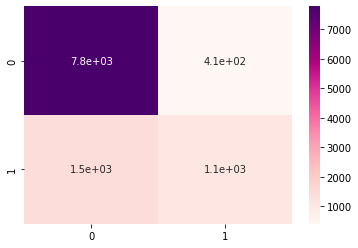

In [81]:

c_matrix_1 = confusion_matrix(y_test,y_pred_test)
c_matrix_1

#Utilizing the heatmap function we have presented the confusion matrix.
sns.heatmap(c_matrix_1 , cmap='RdPu',annot=True)
plt.show()

In [82]:
target_names = ['50k+ Plus Salary','50k- Minus Salary']
print(classification_report(y_test, y_pred_test, target_names=target_names))

                   precision    recall  f1-score   support

 50k+ Plus Salary       0.84      0.95      0.89      8196
50k- Minus Salary       0.72      0.42      0.53      2550

         accuracy                           0.82     10746
        macro avg       0.78      0.69      0.71     10746
     weighted avg       0.81      0.82      0.81     10746



# **Random Forest Machine Learning Algorithm**

In [83]:
# Import RandomForest Algorithm
from sklearn.ensemble import RandomForestClassifier

In [84]:
random = RandomForestClassifier(n_estimators= 100)
y_pred = random.fit(X_train, y_train).predict(X_test)

y_pred_train = random.predict(X_train)
accuracy = accuracy_score(y_train,y_pred_train)
print('Accuracy for train data :',accuracy)

y_pred_test = random.predict(X_test)
accuracy_5 = accuracy_score(y_test,y_pred_test)
print('Accuracy for test data :',accuracy_5)

Accuracy for train data : 1.0
Accuracy for test data : 0.8553880513679508


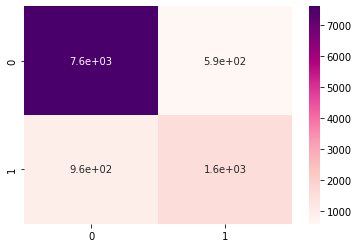

In [85]:

c_matrix_1 = confusion_matrix(y_test,y_pred_test)
c_matrix_1
#Utilizing the heatmap function we have presented the confusion matrix.
sns.heatmap(c_matrix_1 , cmap='RdPu',annot=True)
plt.show()

In [86]:
target_names = ['50k+ Plus Salary','50k- Minus Salary']
print(classification_report(y_test, y_pred_test, target_names=target_names))

                   precision    recall  f1-score   support

 50k+ Plus Salary       0.89      0.93      0.91      8196
50k- Minus Salary       0.73      0.62      0.67      2550

         accuracy                           0.86     10746
        macro avg       0.81      0.77      0.79     10746
     weighted avg       0.85      0.86      0.85     10746



# **Support vector machine Algorithm (SVM)**

In [87]:
# import svm algorithm
from sklearn import svm

In [88]:
clf = svm.SVC(kernel='poly',degree=1)

y_pred = clf.fit(X_train,y_train).predict(X_test)

In [89]:
y_pred_train = clf.predict(X_train)
accuracy = accuracy_score(y_train,y_pred_train)
print('Accuracy for train data : ',accuracy)

y_pred_test = clf.predict(X_test)
accuracy_6 = accuracy_score(y_test,y_pred_test)
print('Accuracy for test data : ',accuracy_6)

Accuracy for train data :  0.8145312858125143
Accuracy for test data :  0.8204913456169738


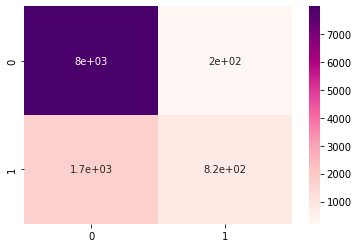

In [90]:

c_matrix_1 = confusion_matrix(y_test,y_pred_test)
c_matrix_1
#Utilizing the heatmap function we have presented the confusion matrix.
sns.heatmap(c_matrix_1 , cmap='RdPu',annot=True)
plt.show()

In [91]:
target_names = ['50k+ Plus Salary','50k- Minus Salary']
print(classification_report(y_test, y_pred_test, target_names=target_names))

                   precision    recall  f1-score   support

 50k+ Plus Salary       0.82      0.98      0.89      8196
50k- Minus Salary       0.80      0.32      0.46      2550

         accuracy                           0.82     10746
        macro avg       0.81      0.65      0.68     10746
     weighted avg       0.82      0.82      0.79     10746



# **Gradient Boosting Algorithm**

In [92]:
# import gradient boosting algorithm
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

In [93]:
gradi = GradientBoostingClassifier(n_estimators=5, learning_rate=1.0,
    max_depth=5, random_state=0)

y_pred = gradi.fit(X_train,y_train)

In [94]:
y_pred_train = gradi.predict(X_train)
accuracy = accuracy_score(y_train,y_pred_train)
print('Accuracy for train data : ',accuracy)

y_pred_test = gradi.predict(X_test)
accuracy_7 = accuracy_score(y_test,y_pred_test)
print('Accuracy for test data : ',accuracy_7)

Accuracy for train data :  0.868530827412331
Accuracy for test data :  0.8619021031081333


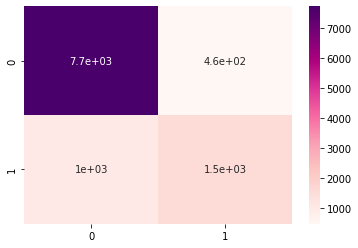

In [95]:

c_matrix_1 = confusion_matrix(y_test, y_pred_test)

#Utilizing the heatmap function we have presented the confusion matrix.
sns.heatmap(c_matrix_1 , cmap='RdPu',annot=True)
plt.show()

In [96]:
target_names = ['50k+ Plus Salary','50k- Minus Salary']
print(classification_report(y_test, y_pred_test, target_names=target_names))

                   precision    recall  f1-score   support

 50k+ Plus Salary       0.88      0.94      0.91      8196
50k- Minus Salary       0.77      0.60      0.67      2550

         accuracy                           0.86     10746
        macro avg       0.83      0.77      0.79     10746
     weighted avg       0.86      0.86      0.86     10746



**Comparison**

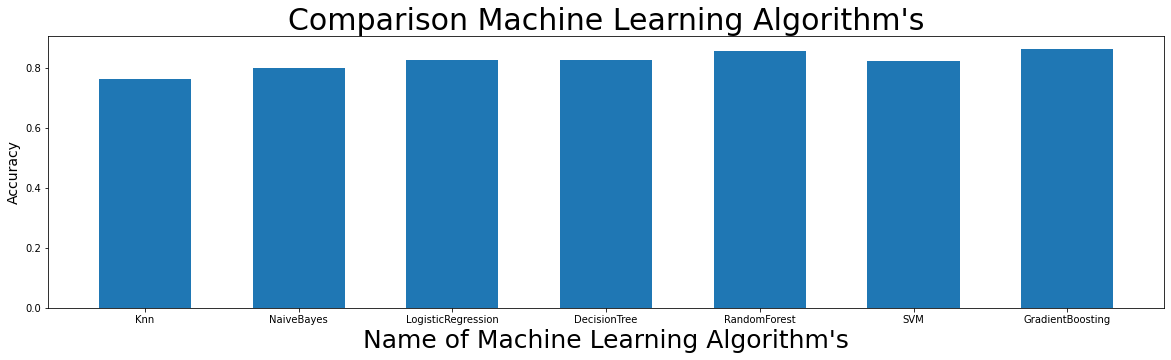

In [97]:
#Lastly we have represented the optimal accuracy by comparing of all the algorithms applying the bar diagram

x = np.array(["Knn", "NaiveBayes", "LogisticRegression", "DecisionTree","RandomForest","SVM","GradientBoosting"])
y = np.array([accuracy_1, accuracy_2, accuracy_3,accuracy_4,accuracy_5,accuracy_6,accuracy_7])
plt.figure(figsize=(20,5))
plt.bar(x,y,width = 0.6)
plt.title("Comparison Machine Learning Algorithm's",size=30)
plt.xlabel("Name of Machine Learning Algorithm's",size=25)
plt.ylabel("Accuracy",size=14)
plt.show()